# Load schedulers and models
- Ref: https://huggingface.co/docs/diffusers/v0.34.0/en/using-diffusers/schedulers

In [1]:
#@title
import torch
cpu_use = False
if torch.backends.mps.is_available():
    t_device = torch.device("mps")
    s_device = "mps"
    print(f"Current memory allocated on MPS: {torch.mps.current_allocated_memory()} bytes")
    print(f"Driver memory allocated on MPS: {torch.mps.driver_allocated_memory()} bytes")
elif torch.cuda.is_available():
    t_device = torch.device("cuda")
    s_device = "cuda"
else:
    t_device = torch.device("cpu")
    s_device = "cpu"
    cpu_use = True
print(t_device)

Current memory allocated on MPS: 0 bytes
Driver memory allocated on MPS: 393216 bytes
mps


In [2]:
import torch
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to(t_device)

/Users/hyunjae.k/anaconda3/envs/2025_drills/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.34.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

## 1. Load a scheduler


In [4]:
from diffusers import DDIMScheduler, DiffusionPipeline

ddim = DDIMScheduler.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", subfolder="scheduler")

In [5]:
pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", scheduler=ddim, torch_dtype=torch.float16, use_safetensors=True
).to(t_device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## 2. Compare scheduler

In [10]:
import torch
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to(t_device)

prompt = "A photograph of an astronaut riding a horse on Mars, high resolution, high definition."
generator = torch.Generator(device=t_device).manual_seed(8)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.34.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [12]:
pipeline.scheduler.compatibles

[diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_edm_euler.EDMEulerScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffuse

In [13]:
schedules_images = {}

from diffusers import LMSDiscreteScheduler

pipeline.scheduler = LMSDiscreteScheduler.from_config(pipeline.scheduler.config)
schedules_images["LMSDiscreteScheduler"] = pipeline(prompt, generator=generator).images[0]



  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
schedules_images["EulerDiscreteScheduler"] = pipeline(prompt, generator=generator).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
from diffusers import EulerAncestralDiscreteScheduler

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)
schedules_images["EulerAncestralDiscreteScheduler"] = pipeline(prompt, generator=generator).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)
schedules_images["DPMSolverMultistepScheduler"] = pipeline(prompt, generator=generator).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/xk/hd_6wmxj32ngdnnm2x5h1_7r0000gn/T/ipykernel_90794/2597691754.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


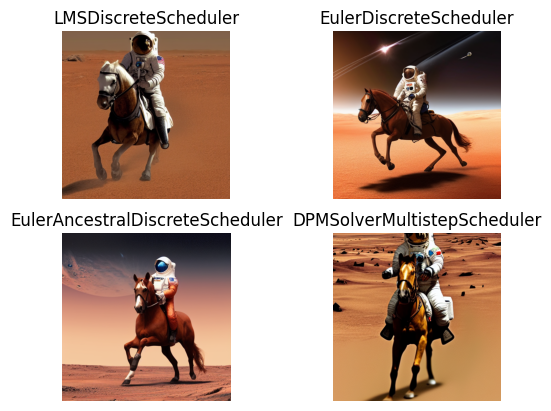

In [21]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 2)
axis[0, 0].imshow(schedules_images["LMSDiscreteScheduler"])
axis[0, 0].set_axis_off()
axis[0, 0].set_title("LMSDiscreteScheduler")

axis[0, 1].imshow(schedules_images["EulerDiscreteScheduler"])
axis[0, 1].set_axis_off()
axis[0, 1].set_title("EulerDiscreteScheduler")

axis[1, 0].imshow(schedules_images["EulerAncestralDiscreteScheduler"])
axis[1, 0].set_axis_off()
axis[1, 0].set_title("EulerAncestralDiscreteScheduler")

axis[1, 1].imshow(schedules_images["DPMSolverMultistepScheduler"])
axis[1, 1].set_axis_off()
axis[1, 1].set_title("DPMSolverMultistepScheduler")

fig.show()